pip install yfinance INSTALADO 

# Alex

In [2]:
#@title Importo las dos librerías que necesito.
import pandas as pd # La poderosa
import numpy as np # La segunda poderosa 
import matplotlib.pyplot as plt # La que grafica
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf # Pa traer la data de Yahoo Finance
#from pandas_datareader import data as pdr # Pa leer la data
import datetime
pd.options.display.float_format = '{:.4f}'.format # Flotantes de 4 decimales.

In [3]:
#@title  Carga de dataset
#Valid periods: 1d,5d,1mo,3mo,6mo,1y,5y,10y,ytd,max. PERIODO DE TIEMPO
#Valid intervals:1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo. TAMAÑO DE LA VELA
#df = yf.download('BTC-USD', start = '2017-08-01', end = '2021-12-27')
#ds_BTC = yf.download('BTC-USD', period = '1mo', interval = '5m') EL PRINCIPAL QUE USO
ds_SPY = yf.download('SPY', period = '1mo', interval = '5m')
ds_BTC = yf.download('BTC-USD', period = '1mo', interval = '60m') #Uno chico
#ds_BTC.describe()
#ds_BTC.head()
ds_SPY.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-19 09:30:00-05:00,458.1300,458.8900,457.7400,457.8900,457.8900,3580758
2022-01-19 09:35:00-05:00,457.9000,459.6124,457.7700,459.3250,459.3250,1721763
2022-01-19 09:40:00-05:00,459.3150,459.3800,458.0300,458.8000,458.8000,1910275
2022-01-19 09:45:00-05:00,458.8300,459.5700,458.4800,458.7000,458.7000,1708329
2022-01-19 09:50:00-05:00,458.7100,459.5800,458.2900,459.2200,459.2200,1407216


In [4]:
ds_BTC['DateTime'] = ds_BTC.index # Importante: Incluyo la cronología en una columna
ds_BTC = ds_BTC[['DateTime','Open','High','Low','Close','Adj Close','Volume']]
# ds_BTC.style.hide_index() | Me falta borrar la columna index.

In [5]:
#@title Encabezado del data set
ds_BTC.head()

,DateTime,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,,
2022-01-20 18:00:00+00:00,2022-01-20 18:00:00+00:00,43080.6484,43080.6484,42951.8633,43060.8867,43060.8867,0
2022-01-20 19:00:00+00:00,2022-01-20 19:00:00+00:00,43061.3945,43116.7852,42917.8906,42942.7539,42942.7539,383803392
2022-01-20 20:00:00+00:00,2022-01-20 20:00:00+00:00,42938.5977,42964.0859,42655.5625,42668.9023,42668.9023,103078912
2022-01-20 21:00:00+00:00,2022-01-20 21:00:00+00:00,42674.0547,42723.3672,41515.2656,41515.2656,41515.2656,763834368
2022-01-20 22:00:00+00:00,2022-01-20 22:00:00+00:00,41497.2695,41505.9570,41099.5703,41236.9297,41236.9297,1333524480


In [6]:
#@title Cantidad de filas para separar el dataframe en 80/20
cant_filas = ds_BTC.shape[0]  #cant_col = ds_BTC.shape[1]  
cant_filas_test =  int(cant_filas * 0.2)
cant_filas_entrenamiento = cant_filas - cant_filas_test

In [7]:
#@title Matriz de correlación
ds_BTC.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.0000,0.9981,0.9979,0.9957,0.9957,0.0525
High,0.9981,1.0000,0.9971,0.9979,0.9979,0.0566
Low,0.9979,0.9971,1.0000,0.9982,0.9982,0.0536
Close,0.9957,0.9979,0.9982,1.0000,1.0000,0.0559
Adj Close,0.9957,0.9979,0.9982,1.0000,1.0000,0.0559
Volume,0.0525,0.0566,0.0536,0.0559,0.0559,1.0000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

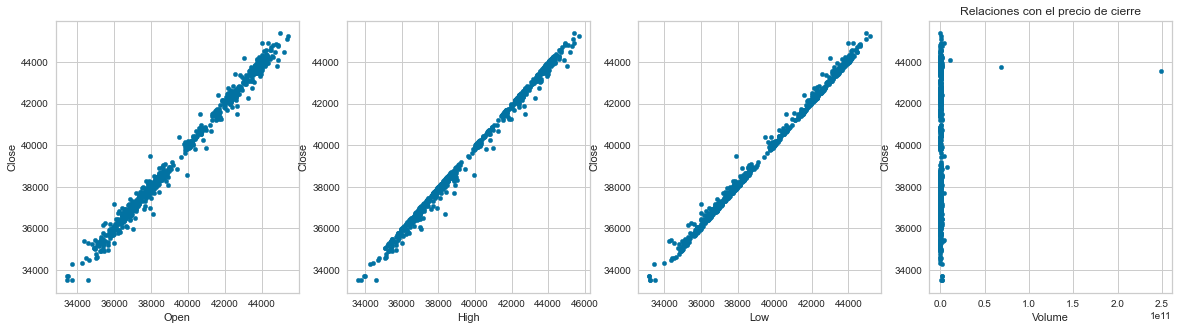

In [8]:
#@title Gráficas de relaciones de variables con el precio
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ds_BTC.plot.scatter(x='Open', y='Close', ax=ax1)
ds_BTC.plot.scatter(x='High', y='Close', ax=ax2)
ds_BTC.plot.scatter(x='Low', y='Close', ax=ax3)
ds_BTC.plot.scatter(x='Volume', y='Close', ax=ax4);
#Definir título y nombres de ejes # ESTA MÁL. CORREGIR
plt.title('Relaciones con el precio de cierre')
plt.legend()
plt.show()

In [ ]:
from pycaret.regression import *

In [ ]:
s = setup(ds_BTC, target = 'Close')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:48:38
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
DateTime,Date
Open,Numeric
High,Numeric
Low,Numeric
Adj Close,Numeric
Volume,Numeric
Close,Label


In [ ]:
best = compare_models()

In [1]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
s = setup(data, target = 'Class variable')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:32:36
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Number of times pregnant,Categorical
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Numeric
Diastolic blood pressure (mm Hg),Numeric
Triceps skin fold thickness (mm),Numeric
2-Hour serum insulin (mu U/ml),Numeric
Body mass index (weight in kg/(height in m)^2),Numeric
Diabetes pedigree function,Numeric
Age (years),Numeric
Class variable,Label


KeyboardInterrupt: Interrupted by user